In [3]:
from google.colab import drive
#drive.mount('')

In [4]:
import pandas as p
import matplotlib.pyplot as mp
import numpy as np
import seaborn as sns



df=p.read_excel("cardatabig.xlsx")
df.head(20)



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [5]:
print("ROWS,COLUMNS)\n",df.shape)

ROWS,COLUMNS)
 (8128, 13)


In [6]:
# PREPROCESSING OF DATA

####################---CHECKING NULL VALUES--#######################

print(df.columns)
print("\n\nNULL VALUES - \n\n",df.isnull().sum())


df=df.drop('name',axis=1)
df=df.drop(['mileage','max_power','engine','torque','seats'],axis=1)



Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')


NULL VALUES - 

 name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [7]:
#################---CONVERTING INTO NUMERICAL VALUES---###################3

print("\n\n",df.fuel.value_counts())

df=df.drop(df.loc[df['fuel']=='Electric'].index)
#print(df.groupby(['fuel']).size())
a=[0 if x=='Diesel' else 1 if x=="Petrol" else 2 for x  in df['fuel']  ]      # 0-diesel    1-petrol   2-other
df['fuel']=a

df=df.drop(  df.loc[df['fuel']==2].index  )
print("\n\n Converted values- \n\n ",df.fuel.value_counts())



 Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64


 Converted values- 

  0    4402
1    3631
Name: fuel, dtype: int64


In [8]:
df=df.drop(df.loc[df.seller_type=='Trustmark Dealer'].index)
print("\n\n",df.seller_type.value_counts())
d=[0 if x=='Individual' else 1 for x  in df['seller_type']]         # 0-individual 1-dealer
df['seller_type']=d

print("\n\n Converted values- \n\n",df.seller_type.value_counts())





 Individual    6673
Dealer        1124
Name: seller_type, dtype: int64


 Converted values- 

 0    6673
1    1124
Name: seller_type, dtype: int64


In [9]:
print("\n\n",df.transmission.value_counts())
b=[0 if x=='Manual' else 1 for x  in df['transmission']]            # 0-manual 1-automatic
df.transmission=b
print("\n\n",df.transmission.value_counts())




 Manual       6846
Automatic     951
Name: transmission, dtype: int64


 0    6846
1     951
Name: transmission, dtype: int64


In [10]:
print("\n\n",df.owner.value_counts())
c=[0 if x=='First Owner' else 1 if x=="Second Owner" else 2 for x  in df['owner']]   # 0-1stowner 1-2ndowner 2-other
df['owner']=c
#df=df.drop(  df.loc[df['owner']==2].index  )
print("\n\n",df.owner.value_counts())




 First Owner             5035
Second Owner            2040
Third Owner              547
Fourth & Above Owner     170
Test Drive Car             5
Name: owner, dtype: int64


 0    5035
1    2040
2     722
Name: owner, dtype: int64


<Axes: xlabel='transmission', ylabel='selling_price'>

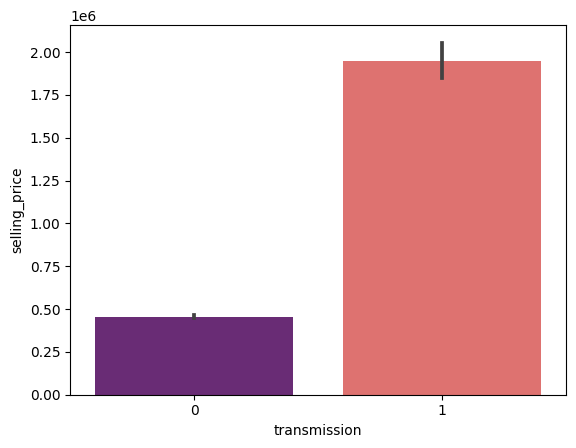

In [11]:
####### DATA VISUALIZATION


sns.barplot(x ='transmission', y ='selling_price', data = df,  palette ='magma')            # 0- manual / 1- automatic

<Axes: xlabel='owner', ylabel='selling_price'>

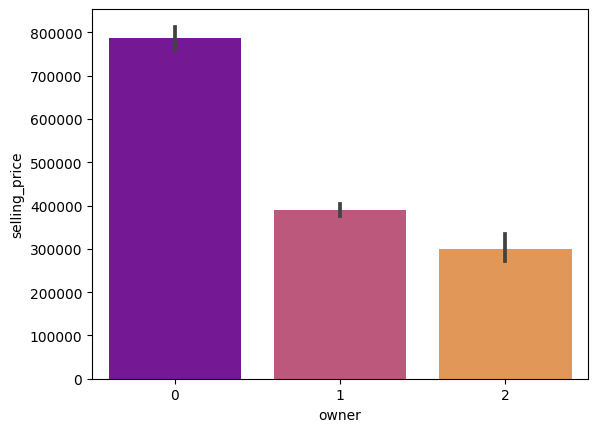

In [12]:
sns.barplot(x ='owner', y ='selling_price', data = df,  palette ='plasma')                  # 0- 1st_owner / 1- 2nd_owner / 2- other


<Axes: xlabel='fuel', ylabel='selling_price'>

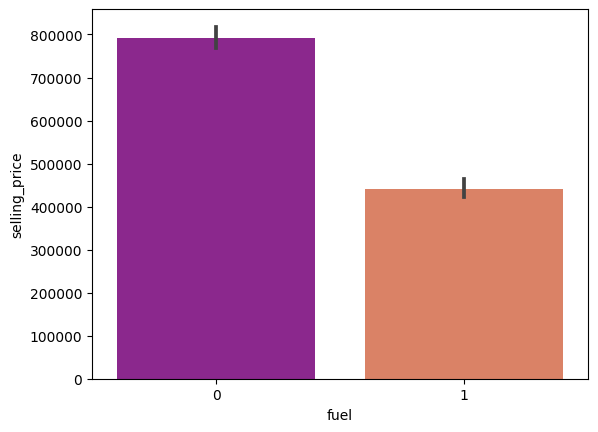

In [13]:
sns.barplot(x ='fuel', y ='selling_price', data = df,  palette ='plasma')             # 0- diesel / 1- petrol


<ipython-input-14-f62d19ff9662>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x ='km_driven', y ='selling_price', data = df,  palette ='plasma')


<Axes: xlabel='km_driven', ylabel='selling_price'>

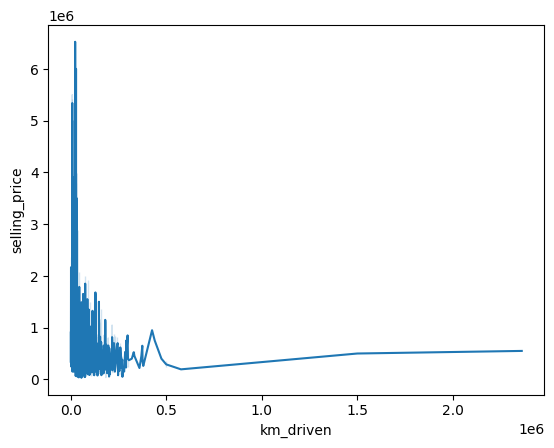

In [14]:
sns.lineplot(x ='km_driven', y ='selling_price', data = df,  palette ='plasma')


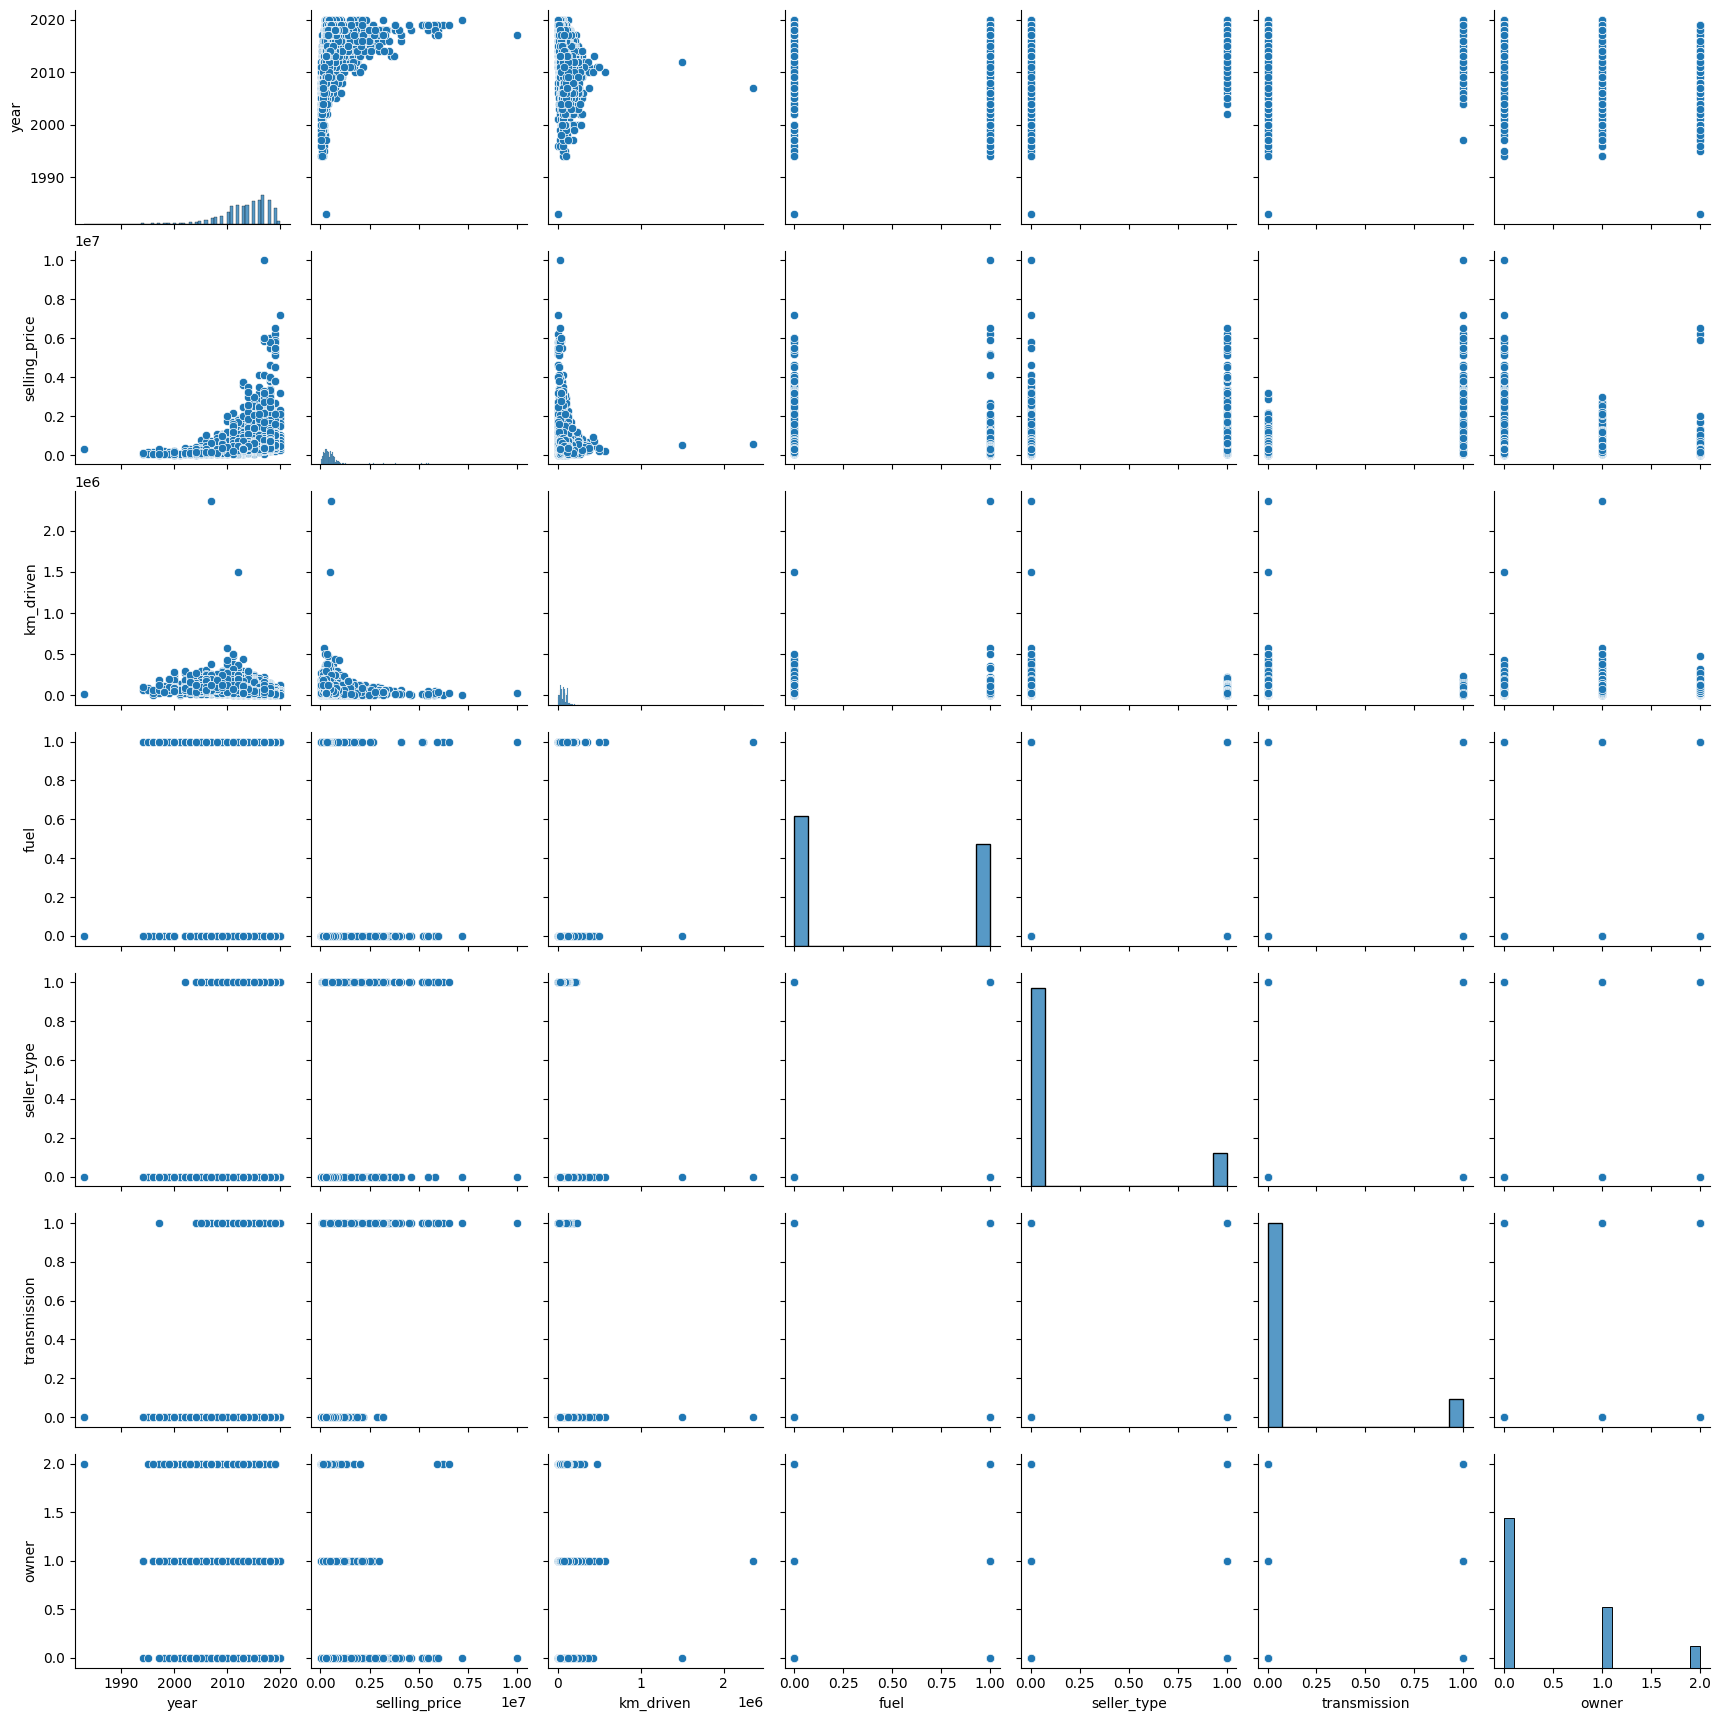

In [15]:
sns.pairplot(df)

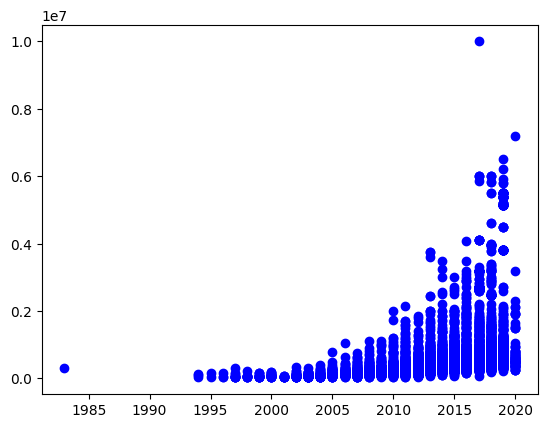

In [16]:
mp.scatter(df['year'],df['selling_price'],color='b')

<Axes: xlabel='seller_type', ylabel='selling_price'>

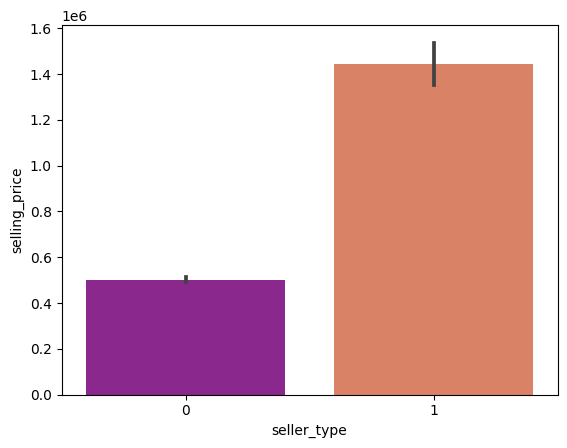

In [17]:
sns.barplot(x ='seller_type', y ='selling_price', data = df,  palette ='plasma')                # 0- individual / 1- dealer


In [18]:
print(df.columns)

print(df.describe())

print(df.shape)


Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')
              year  selling_price     km_driven         fuel  seller_type  \
count  7797.000000   7.797000e+03  7.797000e+03  7797.000000  7797.000000   
mean   2013.746826   6.379204e+05  7.057057e+04     0.439785     0.144158   
std       4.051842   8.168003e+05  5.708669e+04     0.496393     0.351272   
min    1983.000000   2.999900e+04  1.000000e+03     0.000000     0.000000   
25%    2011.000000   2.509990e+05  3.500000e+04     0.000000     0.000000   
50%    2015.000000   4.500000e+05  6.000000e+04     0.000000     0.000000   
75%    2017.000000   6.750000e+05  1.000000e+05     1.000000     0.000000   
max    2020.000000   1.000000e+07  2.360457e+06     1.000000     1.000000   

       transmission        owner  
count   7797.000000  7797.000000  
mean       0.121970     0.446839  
std        0.327272     0.657593  
min        0.000000     0.000000  
25%     

In [19]:
#####################################---SPLIT DATA (TRAIN,TEST)----#####################################


x=df.drop("selling_price",axis=1)
y=df['selling_price']

print(x.columns)


from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest  =  train_test_split(x,y,test_size=0.2,random_state=149)     #149-87


Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


In [27]:
##############################----TRAIN MODEL-----###########################################


# from sklearn.linear_model import LinearRegression
# model=LinearRegression()
# result=model.fit(xtrain,ytrain)

#from sklearn.linear_model import LogisticRegression
#model=LogisticRegression()
#result=model.fit(xtrain,ytrain)

#from sklearn.ensemble import RandomForestRegressor
#model = RandomForestRegressor(n_estimators = 200, random_state = 42)
#result= model.fit(xtrain,ytrain)   #(rf,x_train,y_train,x_test,y_test)


from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
result= model.fit(xtrain,ytrain)
 
prediction=result.predict(xtest)


from sklearn.metrics import r2_score
print('\n\n ACCURACY % - ',r2_score(ytest,prediction)*100)

#from sklearn import metrics
#print("ACCURACY SCORE - ",metrics.accuracy_score(ytest,prediction))


#print("eval : ",model.evaluate(xtest,ytest))    




 ACCURACY % -  81.7553261208505


In [26]:
#######################---Deploying the model---######################


"""
years = 2009
kmdriven = 90000  
fuel_type = 0                  # 0- diesel / 1- petrol
sellertype = 0                 # 0- individual / 1- dealer
transmission_type = 0          # 0- manual / 1- auto
owner_type =  1                # 0- 1st_owner / 1- 2nd_owner / 2- other 
"""

years =          int(input("Enter your year : ") )

kmdriven =       int(input("Enter KMs Driven : ") )

fuel_type =      int(input("Enter the FUEL TYPE : ") )                           # 0- diesel / 1- petrol

sellertype =     int(input("Enter your SELLER TYPE : ") )                        # 0- individual / 1- dealer

transmission_type= int(input("Enter your TRANSMISSION TYPE : ") )                # 0- manual / 1- automatic

owner_type =       int(input("Enter your OWNER TYPE : ") )                       # 0- 1st_owner / 1- 2nd_owner / 2- other 


arr=np.array([ years , kmdriven , fuel_type , sellertype , transmission_type , owner_type])
arr=arr.reshape(1,6)

dep=result.predict(arr) 
#print(arr)

print("\n\n SELLING PRICE OF YOUR CAR - ",dep)

Enter your year : 2011
Enter KMs Driven : 90000
Enter the FUEL TYPE : 0
Enter your SELLER TYPE : 0
Enter your TRANSMISSION TYPE : 0
Enter your OWNER TYPE : 1


 SELLING PRICE OF YOUR CAR -  [228888.88888889]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
